<a href="https://colab.research.google.com/github/meltemtugran/ML-Algoritms-with-world-hapiness-report-/blob/main/MODELLER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


KULLANILACAK KÜTÜPHANELER 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
data = pd.read_csv('2019.csv')
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
# Evaluation Metric

In [ ]:
data.shape

(156, 9)

In [ ]:
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
data.drop(["Overall rank", "Country or region"],axis=1,inplace=True)

In [ ]:
data.columns

Index(['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
data.rename(columns={'Score': 'Happiness Score', 
                   
                   'GDP per capita':'Economy',
                 
                   'Healthy life expectancy' :'Healthy', 
                   'Family': 'social_support',
                   'Healthy (Life Expectancy)':'healthy_life',
                   'Freedom to make life choices':'freedom',
                   'Perceptions of corruption':'corruption',
                   
                  }, inplace=True)

ATAMA
ASSİGN

6 özelliği x ' e ataddık. Traget sütun olarak y ^ye hapiness score değerlerini atadık.

x_data = xx

y_data=y y

In [ ]:
xx = data.drop(['Happiness Score'], axis=1)
yy= data['Happiness Score']

In [ ]:
x_data = data.iloc[:,1:]
y_data = data.loc[:,["Happiness Score"]]

In [ ]:
x_data

,Economy,Social support,Healthy,freedom,Generosity,corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
y_data

,Happiness Score
0,7.769
1,7.600
2,7.554
3,7.494
4,7.488
...,...
151,3.334
152,3.231
153,3.203
154,3.083


NORMALZATİON

In [ ]:
x = (xx - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
y = (yy - np.min(y_data))/(np.max(y_data) - np.min(y_data)).values

TRAİN TEST AYRIMI SPLİT

In [ ]:
X = np.asarray([xx])
y = np.asarray([yy])

clf = LinearRegression()
clf.fit(X.reshape(-1,1),y)


clf.predict([2023])
#Output: array([ 4.5])

clf.predict([2001])
#Output: array([ 8.9])

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

ValueError: ignored

#lineer regresyon

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print("accuracy score of linear regression model:",reg.score(x_test,y_test))

accuracy score of linear regression model: 0.7863696902483333


In [ ]:
reg.coef_

array([[0.25121719, 0.39482758, 0.26131821, 0.18157012, 0.04107105,
        0.13266353]])

In [ ]:
y_pred1 = reg.predict(x_test) # get y predictions


In [ ]:
x_train = x_train.sort_index()
y_train = y_train.sort_index()

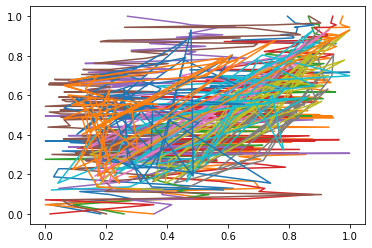

In [ ]:
plt.plot(x_train,y_train)
plt.plot(x_test,y_pred1)
plt.show()

In [ ]:
ols = sm.OLS(y_pred1, x_test)
print(ols.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              893.0
Date:                Thu, 06 Jan 2022   Prob (F-statistic):                    4.87e-35
Time:                        09:56:17   Log-Likelihood:                          67.773
No. Observations:                  39   AIC:                                     -123.5
Df Residuals:                      33   BIC:                                     -113.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 3
cv_result = cross_val_score(reg,x_train,y_train,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.76919619 0.69469891 0.72519641]
CV scores average:  0.7296971705014332


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7) #n_neighbors=k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test) 
print("{} nn score: {}".format(3,knn.score(x,y)))

3 nn score: 0.8078978796409017


In [ ]:
y_pred2 = knn.predict(x_test)

In [ ]:
knn.coef_

AttributeError: ignored

In [ ]:
ols = sm.OLS(y_pred2, x_test)
print(ols.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              569.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):                    7.74e-32
Time:                        20:43:02   Log-Likelihood:                          58.563
No. Observations:                  39   AIC:                                     -105.1
Df Residuals:                      33   BIC:                                     -95.14
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7) #n_neighbors=k
knn.fit(x,y)
prediction = knn.predict(x_test) 
print("{} nn score: {}".format(5,knn.score(x,y)))

5 nn score: 0.8301181413831957


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7) #n_neighbors=k
knn.fit(x,y)
prediction = knn.predict(x_test) 
print("{} nn score: {}".format(10,knn.score(x,y)))

10 nn score: 0.8301181413831957


In [ ]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 5}
Best score: 0.7472840184513353


In [ ]:
# get importance
importance = knn.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

AttributeError: ignored

#decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
print("accuracy of decision tree model :",dt.score(x_test,y_test))

accuracy of decision tree model : 0.4384013875461388


In [ ]:
y_pred3 = dt.predict(x_test)
ols = sm.OLS(y_pred3, x_test)
print(ols.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              98.42
Date:                Tue, 04 Jan 2022   Prob (F-statistic):                    1.27e-19
Time:                        20:43:33   Log-Likelihood:                          24.262
No. Observations:                  39   AIC:                                     -36.52
Df Residuals:                      33   BIC:                                     -26.54
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'min_samples_leaf': np.arange(1,25),"criterion":["mse","friedman_mse","mae"]}
det = DecisionTreeRegressor()
det_cv = GridSearchCV(det, grid, cv=3) # GridSearchCV
det_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(det_cv.best_params_)) 
print("Best score: {}".format(det_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

Tuned hyperparameter k: {'criterion': 'mae', 'min_samples_leaf': 4}
Best score: 0.7141966981022133


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

#RANDOM FOREST 

In [ ]:
data.columns

Index(['Happiness Score', 'Economy', 'Social support', 'Healthy', 'freedom',
       'Generosity', 'corruption'],
      dtype='object')

In [ ]:
X = data.drop(['Happiness Score'], axis=1)
y = data['Happiness Score']

In [ ]:
data.head()

,Happiness Score,Economy,Social support,Healthy,freedom,Generosity,corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
x.head()

,Economy,Social support,Healthy,freedom,Generosity,corruption
0,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x,y)
print("accuracy score of random forest model:",rf.score(x_test,y_test))

accuracy score of random forest model: -523.2613735375794


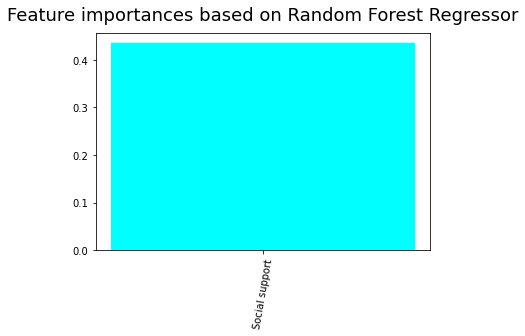

In [ ]:
ranking = rf.feature_importances_
features = np.argsort(ranking)[ ::][:15]
columns = x.columns

plt.title("Feature importances based on Random Forest Regressor", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

In [ ]:
data.columns

Index(['Happiness Score', 'Economy', 'Social support', 'Healthy', 'freedom',
       'Generosity', 'corruption'],
      dtype='object')

In [ ]:
importance = rf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.25029
Feature: 1, Score: 0.44191
Feature: 2, Score: 0.14751
Feature: 3, Score: 0.07137
Feature: 4, Score: 0.03367
Feature: 5, Score: 0.05526


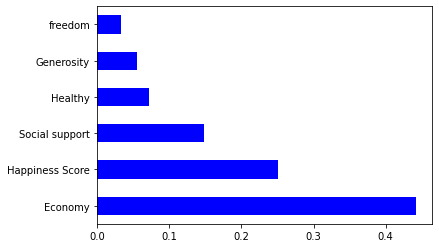

In [ ]:
index= data.columns[:-1]
importance = pd.Series(rf.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf,x_train,y_train,cv=5))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

[0.7354898  0.79276562 0.7895419  0.86262819 0.57620117]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
y_pred4 = rf.predict(x_test)
ols = sm.OLS(y_pred4, x_test)
print(ols.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              424.3
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                    9.22e-30
Time:                        03:30:23   Log-Likelihood:                          52.760
No. Observations:                  39   AIC:                                     -93.52
Df Residuals:                      33   BIC:                                     -83.54
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#SVM

In [ ]:
from sklearn.linear_model import SGDRegressor 

svm = SGDRegressor()
svm.fit(x_train,y_train)

#test
print("print accuracy of svm algo:",svm.score(x_test,y_test))

print accuracy of svm algo: 0.6405667927279282


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred5 = svm.predict(x_test)
ols = sm.OLS(y_pred5, x_test)
print(ols.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2160.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):                    2.44e-41
Time:                        20:44:08   Log-Likelihood:                          85.314
No. Observations:                  39   AIC:                                     -158.6
Df Residuals:                      33   BIC:                                     -148.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = {'learning_rate':["constant","optimal","invscaling","adaptive"]}
svm = SGDRegressor()
svm_cv = GridSearchCV(svm, grid, cv=3) # GridSearchCV
svm_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(svm_cv.best_params_)) 
print("Best score: {}".format(svm_cv.best_score_))

Tuned hyperparameter k: {'learning_rate': 'adaptive'}
Best score: 0.6319918241877059


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

#RİDGE REGRESYON 

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
print('Accuracy score of ridge resgression model: ',ridge.score(x_test,y_test))

Accuracy score of ridge resgression model:  0.7924717828928474


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(ridge,x_train,y_train,cv=5))

[0.80002651 0.69215868 0.67675293 0.80925334 0.64425952]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

In [ ]:
y_pred6 = ridge.predict(x_test)
ols =sm.OLS(y_pred6, x_test)
print(ols.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1152.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):                    7.43e-37
Time:                        20:44:22   Log-Likelihood:                          72.870
No. Observations:                  39   AIC:                                     -133.7
Df Residuals:                      33   BIC:                                     -123.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Predict Score
print("print accuracy of dt algo:",reg.score(x_test,y_test))

print accuracy of dt algo: 0.7863696902483333


In [ ]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 3
cv_result = cross_val_score(reg,x_train,y_train,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.76919619 0.69469891 0.72519641]
CV scores average:  0.7296971705014332


In [ ]:
# get importance
importance = LinearRegression.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

AttributeError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7) #n_neighbors=k
knn.fit(x,y)
prediction = knn.predict(x_test) #prediction test ile alakalidir.

print("{} nn score: {}".format(3,knn.score(x,y)))

3 nn score: 0.8301181413831957


In [ ]:
data.fillna(-99999, inplace=True)

In [ ]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

ValueError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data = data.iloc[:,[1,2,6,7,8,9,10,11]]
data = pd.get_dummies(data)

X, y = data.iloc[:,1:16], data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [ 2.41680643e-01  2.64831372e+00 -2.09841577e-03  2.11521253e+00
  4.69846885e-01 -4.06691228e-01 -4.59999392e-01 -8.75527588e-01
 -4.49640486e-01 -4.44367675e-01 -7.24197929e-01 -6.82750424e-02
 -1.04831091e+00 -1.11257315e+00 -8.95702179e-01]
lr.intercept_: 0.4758013792720446
Training set score: 0.83
Test set score: 0.72
